In [1]:
import numpy as np
from scipy.special import lambertw
import matplotlib.pyplot as plt

In [2]:
def passes_needed(Xtarget_init, Xfiber, X_I_want, max_passes=2000, coll=True, poiss=True):
    nleft = []
    Xremaining = Xtarget_init
    cumulative = 0.0
    nleft.append(Xtarget_init)
    for n in range(1, max_passes + 1):
        lambda_ = Xremaining/Xfiber
        p_associated = 1-np.exp(-lambda_)
        associated_this_pass = Xfiber
        if poiss: associated_this_pass *= p_associated
        #S = 1/Xfiber
        #rf = np.sqrt(S/np.pi)
        #Sf = np.pi*rf**2
        #Sc = (10/100) * Sf
        #mu_coll = Sc * associated_this_pass
        observed_this_pass = associated_this_pass 
        #if coll: observed_this_pass *= np.exp(-mu_coll)
        cumulative += observed_this_pass
        Xremaining -= observed_this_pass
        nleft.append(Xremaining)
        #if Xremaining < 0:
        if Xremaining < 1:
            return n, cumulative, Xremaining, nleft

[50000, 40067.379469990854, 30249.30590915864, 20734.917826567453, 11992.37719406095, 5006.616133509906, 1067.9111700110966, 55.04496332218616, 0.15121980916804034]


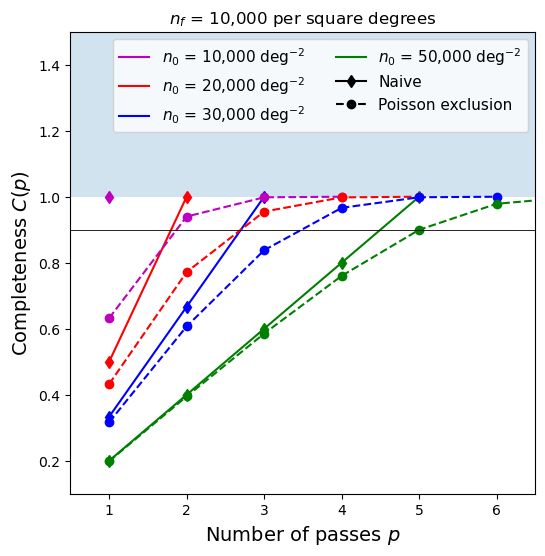

In [3]:
plt.figure(figsize=(6,6))
plt.title(r'$n_f$ = 10,000 per square degrees')

n, cumulative, Xremaining, nleft = passes_needed(10000, 10000, 10000, max_passes=2000, coll=False, poiss=False)
plt.plot(np.arange(n+1)[1:], 1-np.array(nleft)[1:]/10000, '-dm')
n, cumulative, Xremaining, nleft = passes_needed(20000, 10000, 20000, max_passes=2000, coll=False, poiss=False)
plt.plot(np.arange(n+1)[1:], 1-np.array(nleft)[1:]/20000, '-dr')
n, cumulative, Xremaining, nleft = passes_needed(30000, 10000, 30000, max_passes=2000, coll=False, poiss=False)
plt.plot(np.arange(n+1)[1:], 1-np.array(nleft)[1:]/30000, '-db')
n, cumulative, Xremaining, nleft = passes_needed(50000, 10000, 50000, max_passes=2000, coll=False, poiss=False)
plt.plot(np.arange(n+1)[1:], 1-np.array(nleft)[1:]/50000, '-dg')

n, cumulative, Xremaining, nleft = passes_needed(10000, 10000, 10000, max_passes=2000, coll=False, poiss=True)
plt.plot(np.arange(n+1)[1:], 1-np.array(nleft)[1:]/10000, '--om')
n, cumulative, Xremaining, nleft = passes_needed(20000, 10000, 20000, max_passes=2000, coll=False, poiss=True)
plt.plot(np.arange(n+1)[1:], 1-np.array(nleft)[1:]/20000, '--or')
n, cumulative, Xremaining, nleft = passes_needed(30000, 10000, 30000, max_passes=2000, coll=False, poiss=True)
plt.plot(np.arange(n+1)[1:], 1-np.array(nleft)[1:]/30000, '--ob')
n, cumulative, Xremaining, nleft = passes_needed(50000, 10000, 50000, max_passes=2000, coll=False, poiss=True)
plt.plot(np.arange(n+1)[1:], 1-np.array(nleft)[1:]/50000, '--og')

n, cumulative, Xremaining, nleft = passes_needed(10000, 10000, 10000, max_passes=2000, coll=False, poiss=True)
plt.plot([], [], '-m',label = r'$n_{0}$ = 10,000 deg$^{-2}$')
n, cumulative, Xremaining, nleft = passes_needed(20000, 10000, 20000, max_passes=2000, coll=False, poiss=True)
plt.plot([], [], '-r', label = r'$n_{0}$ = 20,000 deg$^{-2}$')
n, cumulative, Xremaining, nleft = passes_needed(30000, 10000, 30000, max_passes=2000, coll=False, poiss=True)
plt.plot([], [], '-b',label = r'$n_{0}$ = 30,000 deg$^{-2}$')
n, cumulative, Xremaining, nleft = passes_needed(50000, 10000, 50000, max_passes=2000, coll=False, poiss=True)
plt.plot([], [], '-g',label = r'$n_{0}$ = 50,000 deg$^{-2}$')

print(nleft)
plt.hlines(0.9, 0, 12.5, ls='-', lw=0.6, color='k')
plt.fill_between(np.linspace(-10, 10, 100), 1+0*np.linspace(-10, 10, 100), 2+0*np.linspace(-10, 10, 100), alpha=0.2)
plt.xlim(0.5, 6.5)
plt.ylim(0.1, 1.5)


plt.xticks(np.arange(1, 7, 1))  # from 1 to 5
plt.plot([], [], ls='-', marker='d', color = 'k', label = 'Naive')
plt.plot([], [], ls = '--', marker='o', color = 'k', label = 'Poisson exclusion')
plt.legend(fontsize=11, ncols=2)
plt.xlabel('Number of passes $p$', fontsize=14)
plt.ylabel(r'Completeness $C(p)$', fontsize=14)

plt.savefig('completeness.png', dpi = 300, bbox_inches='tight',)

In [4]:
import numpy as np

def passes_needed_3tracers(Xtarget_init, Xfiber, N_pass, max_passes=2000, coll=True, poiss=True):
    """
    Xtarget_init: array-like of initial densities for 3 tracers [n1, n2, n3]
    Xfiber: total fiber density
    N_pass: array-like of required number of exposures for each tracer [N1, N2, N3]
    max_passes: maximum number of passes to simulate
    coll: whether to include collisions
    poiss: whether to apply exclusion Poisson law
    """
    
    # Convert to np arrays
    Xtarget_init = np.array(Xtarget_init, dtype=float)
    N_pass = np.array(N_pass, dtype=float)
    
    # Total pointings needed per tracer
    Xremaining = Xtarget_init * N_pass  # shape (3,)
    
    nleft = [Xremaining.copy()]
    
    cumulative = np.zeros_like(Xremaining)  # cumulative observed per tracer
    
    for p in range(1, max_passes + 1):
        total_remaining = Xremaining.sum()
        if total_remaining < 1:
            return p, cumulative, Xremaining, nleft
        
        # Total fiber allocation this pass
        assigned = Xfiber
        if poiss:
            assigned *= 1 - np.exp(-total_remaining / Xfiber)
        
        # Distribute assigned fibers proportionally to remaining pointings
        obs_this_pass = assigned * Xremaining / total_remaining
        
        # Update remaining and cumulative
        Xremaining -= obs_this_pass
        cumulative += obs_this_pass
        nleft.append(Xremaining.copy())
        
    return max_passes, cumulative, Xremaining, nleft


In [5]:
import numpy as np

def passes_needed_3tracers_priority(Xtarget_init, Xfiber, N_pass, max_passes=2000, coll=True, poiss=True):
    """
    Xtarget_init: array-like of initial densities for 3 tracers [n1, n2, n3]
    Xfiber: total fiber density
    N_pass: array-like of required number of exposures for each tracer [N1, N2, N3]
    max_passes: maximum number of passes to simulate
    coll: whether to include collisions
    poiss: whether to apply exclusion Poisson law
    """
    
    # Convert to np arrays
    Xtarget_init = np.array(Xtarget_init, dtype=float)
    N_pass = np.array(N_pass, dtype=float)
    
    # Total pointings needed per tracer
    Xremaining = Xtarget_init * N_pass  # shape (3,)
    
    nleft = [Xremaining.copy()]
    
    cumulative = np.zeros_like(Xremaining)  # cumulative observed per tracer
    
    for p in range(1, max_passes + 1):
        total_remaining = Xremaining.sum()
        if total_remaining < 1:
            return p, cumulative, Xremaining, nleft
        
        fibers_left = Xfiber  # total fibers available this pass
        obs_this_pass = np.zeros_like(Xremaining)
        
        # Loop over tracers in priority order (0 -> 2)
        for k in range(len(Xremaining)):
            if Xremaining[k] < 1e-6:
                continue  # nothing left to observe
            
            n_fiber = fibers_left
            if poiss:
                n_fiber *= 1 - np.exp(-Xremaining[k] / fibers_left)
            
            if coll:
                S = 1 / Xfiber
                rf = np.sqrt(S/np.pi)
                Sf = np.pi * rf**2
                Sc = 0.10 * Sf  # 10% collision area fraction
                mu_coll = Sc * Xremaining[k]
                n_fiber *= np.exp(-mu_coll)
            
            # Observed for this tracer
            obs = min(n_fiber, Xremaining[k])  # cannot exceed remaining
            obs_this_pass[k] = obs
            
            # Update remaining fibers
            fibers_left -= obs
            
            # Stop if no fibers left
            if fibers_left <= 0:
                break
        
        # Update remaining and cumulative
        Xremaining -= obs_this_pass
        cumulative += obs_this_pass
        nleft.append(Xremaining.copy())
        
    return max_passes, cumulative, Xremaining, nleft


30000
[array([10000., 10000., 10000.]), array([6832.62356123, 6832.62356123, 6832.62356123]), array([3928.49795536, 3928.49795536, 3928.49795536]), array([1620.91397106, 1620.91397106, 1620.91397106]), array([337.29123886, 337.29123886, 337.29123886]), array([16.5034966, 16.5034966, 16.5034966]), array([0.04078747, 0.04078747, 0.04078747])]


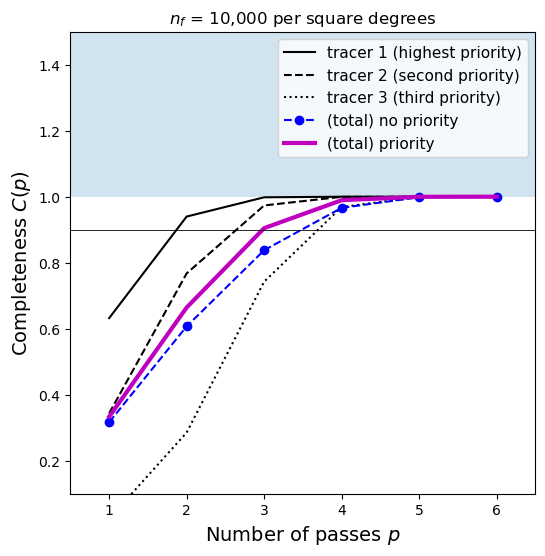

In [6]:
n, N = [10000, 5000, 2000], [1,2,5]
n_tot_tracer = np.array(n)*np.array(N)
print(np.sum(n_tot_tracer))
max_passes, cumulative, Xremaining, nleft = passes_needed_3tracers(n, 10000, N, max_passes=2000, coll=False, poiss=True)
max_passes_prio, cumulative_prio, Xremaining_prio, nleft_prio = passes_needed_3tracers_priority(n, 10000, N, max_passes=2000, coll=False, poiss=True)


plt.figure(figsize=(6,6))
plt.title(r'$n_f$ = 10,000 per square degrees')

plt.plot(np.arange(1,max_passes_prio+1)[1:]-1,1-np.array(nleft_prio)[1:][:,0]/n_tot_tracer[0], '-k', label='tracer 1 (highest priority)')
plt.plot(np.arange(1,max_passes_prio+1)[1:]-1,1-np.array(nleft_prio)[1:][:,1]/n_tot_tracer[1], '--k', label='tracer 2 (second priority)')
plt.plot(np.arange(1,max_passes_prio+1)[1:]-1,1-np.array(nleft_prio)[1:][:,2]/n_tot_tracer[2], ':k', label='tracer 3 (third priority)')


plt.plot(np.arange(1,max_passes+1)[1:]-1,1-(np.array(nleft)[1:][:,0]+ np.array(nleft)[1:][:,1] + np.array(nleft)[1:][:,2])/np.sum(n_tot_tracer), '--bo',
         label='(total) no priority')
plt.plot(np.arange(1,max_passes_prio+1)[1:]-1,1-(np.array(nleft_prio)[1:][:,0]+ np.array(nleft_prio)[1:][:,1] + np.array(nleft_prio)[1:][:,2])/np.sum(n_tot_tracer), '-m',
        label='(total) priority', lw=3)
print(nleft)
plt.hlines(0.9, 0, 12.5, ls='-', lw=0.6, color='k')
plt.fill_between(np.linspace(-10, 10, 100), 1+0*np.linspace(-10, 10, 100), 2+0*np.linspace(-10, 10, 100), alpha=0.2)
plt.xlim(0.5, 6.5)
plt.ylim(0.1, 1.5)


plt.xticks(np.arange(1, 7, 1))  # from 1 to 5
plt.legend(fontsize=11, ncols=1)
plt.xlabel('Number of passes $p$', fontsize=14)
plt.ylabel(r'Completeness $C(p)$', fontsize=14)

plt.savefig('completeness_priority.png', dpi = 300, bbox_inches='tight',)